In [29]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [212]:
# Lendo os dados mensais de despesas e receitas
dados = pd.read_csv('resultado_primario.csv', decimal = ',', parse_dates = ['Mes'], date_parser = lambda s : [pd.datetime.strptime(x, '%m/%y') for x in s])

# PIB
dfpib = pd.read_csv('PIB.csv', sep = ';', decimal = ',', parse_dates = ['data'], date_parser = lambda s: [pd.datetime.strptime(x, '%d/%m/%y') for x in s])

In [213]:
# Meses de déficit no período
dados[dados.recliq < dados.Despesa]

,Mes,Despesa,Receita,recliq
0,1997-01-01,40779.433780,46549.919753,37076.391523
6,1997-07-01,42340.142997,48668.790957,41943.600707
8,1997-09-01,42266.598310,46900.976945,39708.914490
9,1997-10-01,44962.513748,49450.313987,42143.935233
11,1997-12-01,65337.835143,67135.427375,59504.861029
16,1998-05-01,39783.365256,48138.876833,39577.191241
17,1998-06-01,44564.967610,44415.299775,38006.739799
18,1998-07-01,41950.954858,48994.209345,41857.176073
20,1998-09-01,42658.486871,48246.417010,40009.325297
21,1998-10-01,45170.849620,47074.427778,39902.424960


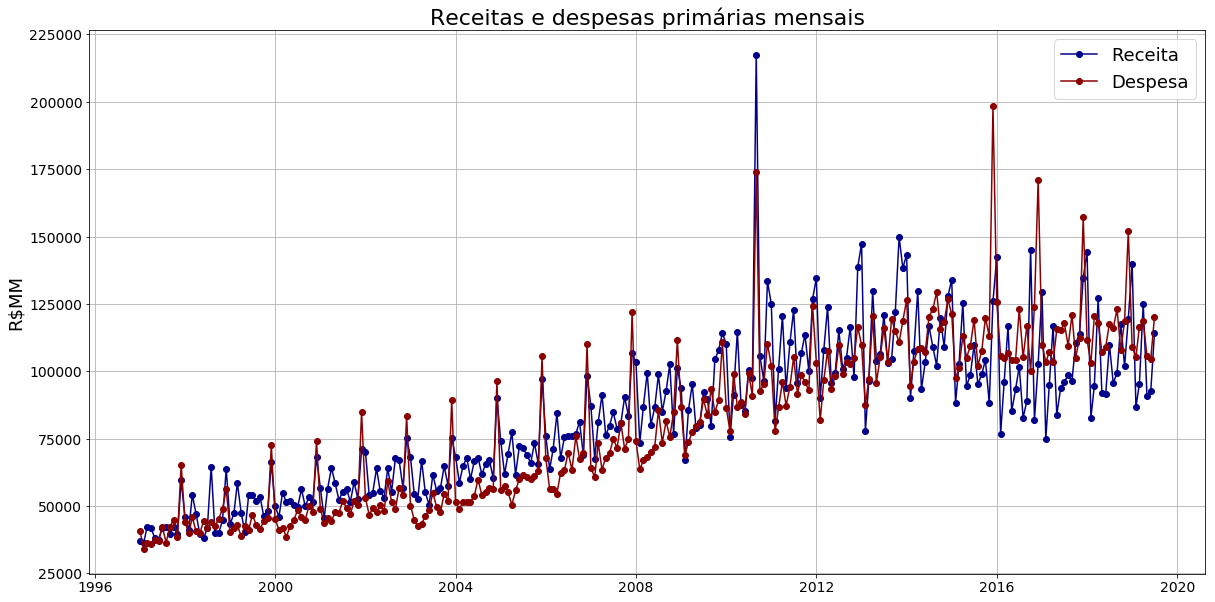

In [214]:
# Séries mensais
fig = plt.figure(figsize = (20, 10))

plt.plot(dados.Mes, dados.recliq, 'o-', label = 'Receita', color = 'darkblue')
plt.plot(dados.Mes, dados.Despesa, 'o-', label = 'Despesa', color = 'darkred')
plt.legend(fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('R$MM', fontsize = 18)
plt.title('Receitas e despesas primárias mensais', fontsize = 22)
plt.grid(True)

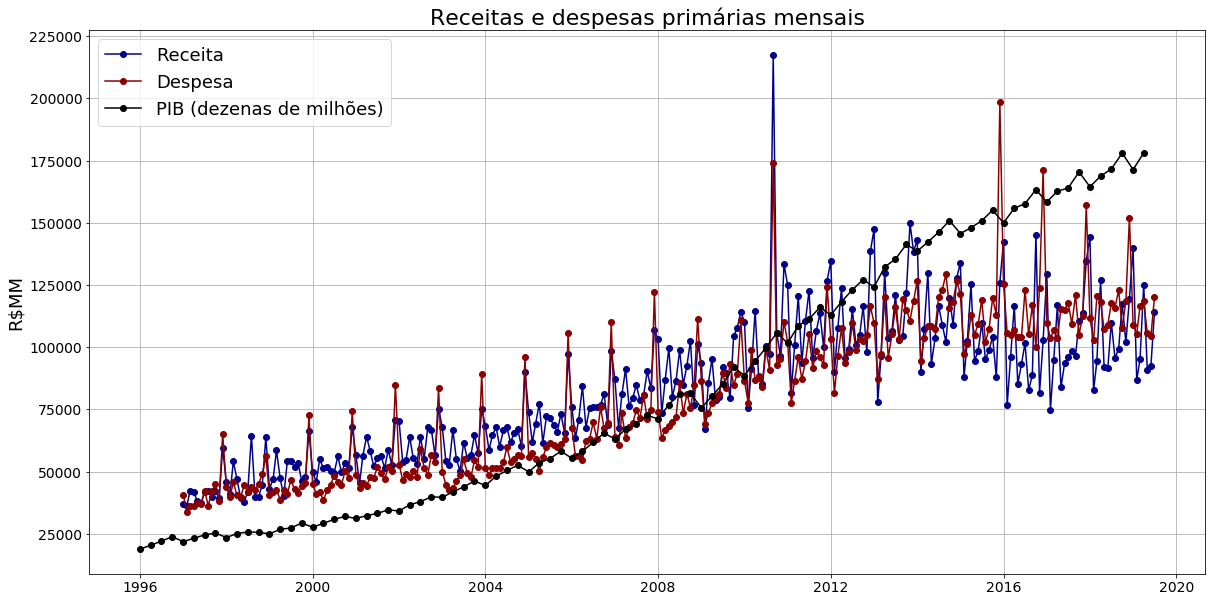

In [215]:
# Séries mensais e PIB
fig = plt.figure(figsize = (20, 10))

plt.plot(dados.Mes, dados.recliq, 'o-', label = 'Receita', color = 'darkblue')
plt.plot(dados.Mes, dados.Despesa, 'o-', label = 'Despesa', color = 'darkred')
plt.plot(dfpib.data, dfpib.pib/10, 'o-', label = 'PIB (dezenas de milhões)', color = 'black')
plt.legend(fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('R$MM', fontsize = 18)
plt.title('Receitas e despesas primárias mensais', fontsize = 22)
plt.grid(True)

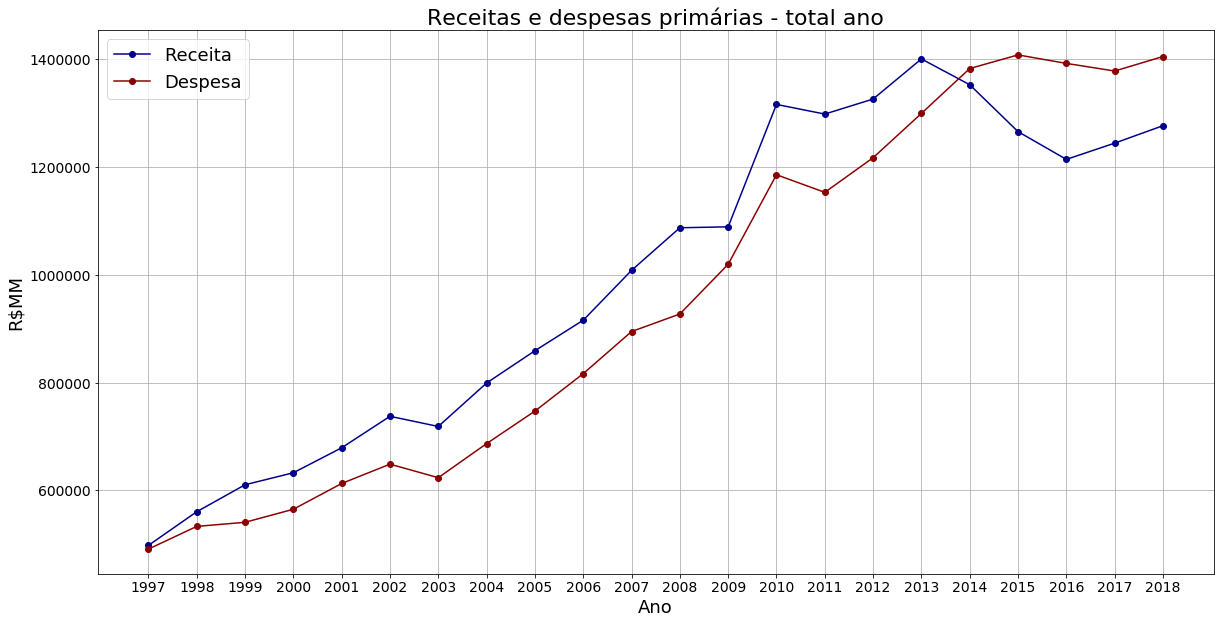

In [222]:
# Agrupando por ano
dados_ano = dados.groupby(dados.Mes.dt.year).sum().reset_index()
dados_ano = dados_ano[dados_ano.Mes < 2019]
dados_ano.rename({'Mes' : 'Ano'}, inplace = True, axis = 1)

# Acumulando PIB por ano
dfpib_ano = dfpib.groupby(dfpib.data.dt.year).sum().reset_index()
dfpib_ano = dfpib_ano[dfpib_ano.data < 2019]

fig = plt.figure(figsize = (20, 10))

plt.plot(dados_ano.Ano, dados_ano.recliq, 'o-', label = 'Receita', color = 'darkblue')
plt.plot(dados_ano.Ano, dados_ano.Despesa, 'o-', label = 'Despesa', color = 'darkred')
#plt.plot(dfpib_ano.data, dfpib_ano.pib, 'o-', label = 'PIB (dezenas de milhões)', color = 'black')
plt.legend(fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Ano', fontsize = 18)
plt.ylabel('R$MM', fontsize = 18)
plt.title('Receitas e despesas primárias - total ano', fontsize = 22)
plt.xticks(ticks = range(1997,2019))
plt.grid(True)

In [244]:
# Resultado
dados_ano['res'] = dados_ano.recliq - dados_ano.Despesa

dfres = dados_ano.set_index('Ano').diff().dropna()

In [254]:
dfres['pd'] = dfres.res / dfres.recliq
dfres['pr'] = dfres.res / dfres.Despesa

In [255]:
dfres

,Despesa,Receita,recliq,res,pd,pr
Ano,,,,,,
1998,42069.855965,70078.321652,62440.275087,20370.419122,0.326238,0.484205
1999,7603.641196,57132.159929,49992.143997,42388.502801,0.847903,5.574764
2000,24168.594508,34941.183173,22239.913841,-1928.680666,-0.086722,-0.079801
2001,47778.071661,57847.019996,46298.336305,-1479.735355,-0.031961,-0.030971
2002,35828.537899,73050.734942,58376.316610,22547.778711,0.386249,0.629325
2003,-25108.323790,-25347.655202,-18834.984641,6273.339149,-0.333068,-0.249851
2004,63219.855517,87973.144309,80542.560712,17322.705195,0.215075,0.274007
2005,60243.779059,84594.041983,59834.527006,-409.252053,-0.006840,-0.006793
2006,69431.775348,70305.466612,56577.553041,-12854.222307,-0.227197,-0.185135


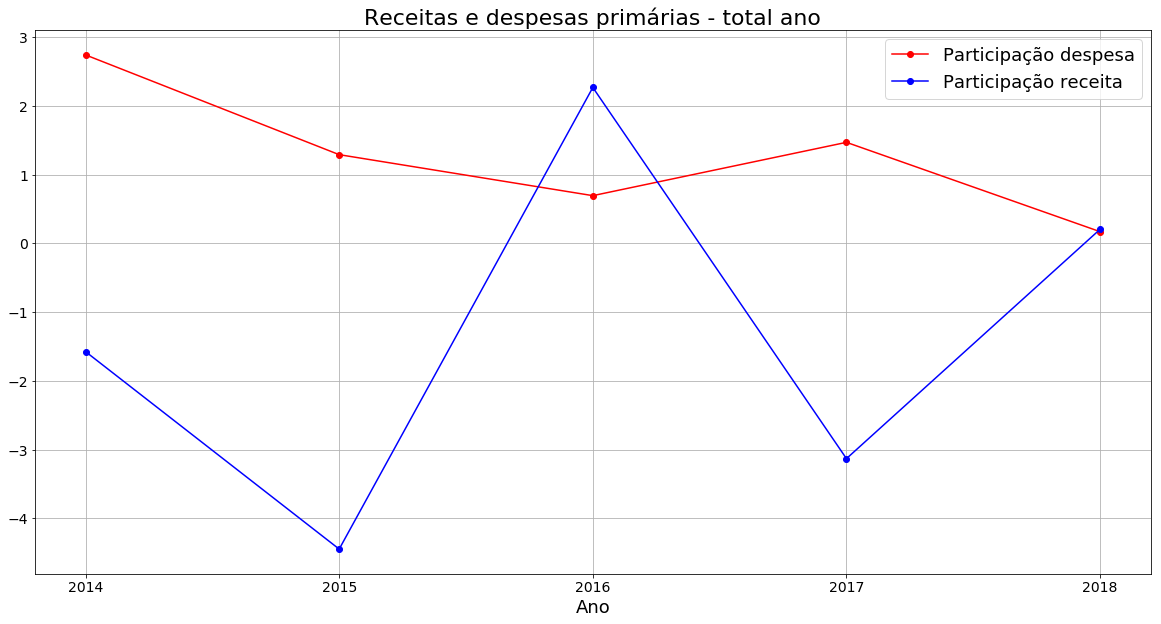

In [259]:
fig = plt.figure(figsize = (20, 10))

plt.plot(dfres[dfres.index >= 2014].pd, 'o-', label = 'Participação despesa', color = 'red')
plt.plot(dfres[dfres.index >= 2014].pr, 'o-', label = 'Participação receita', color = 'blue')

plt.legend(fontsize = 18)
plt.xticks(range(2014, 2019), fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Ano', fontsize = 18)
plt.ylabel('', fontsize = 18)
plt.title('Receitas e despesas primárias - total ano', fontsize = 22)
plt.grid(True)

In [217]:
# % do PIB
dfano = dfpib_ano.merge(dados_ano, left_on = 'data', right_on = 'Ano', how = 'inner')
dfano.drop('data', axis = 1, inplace = True)
dfano['rec'] = dfano.recliq / dfano.pib
dfano['desp'] = dfano.Despesa / dfano.pib

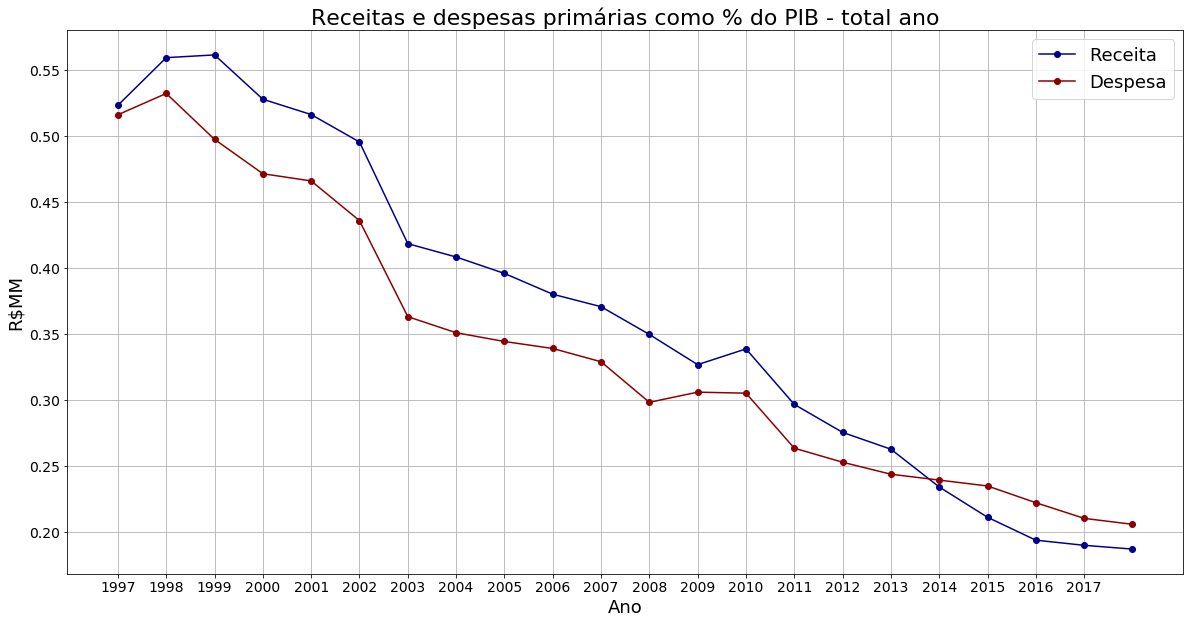

In [218]:
fig = plt.figure(figsize = (20, 10))

plt.plot(dfano.Ano, dfano.rec, 'o-', label = 'Receita', color = 'darkblue')
plt.plot(dfano.Ano, dfano.desp, 'o-', label = 'Despesa', color = 'darkred')
#plt.plot(dfpib_ano.data, dfpib_ano.pib, 'o-', label = 'PIB (dezenas de milhões)', color = 'black')
plt.legend(fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Ano', fontsize = 18)
plt.ylabel('R$MM', fontsize = 18)
plt.title('Receitas e despesas primárias como % do PIB - total ano', fontsize = 22)
plt.xticks(ticks = range(1997,2018))
plt.grid(True)

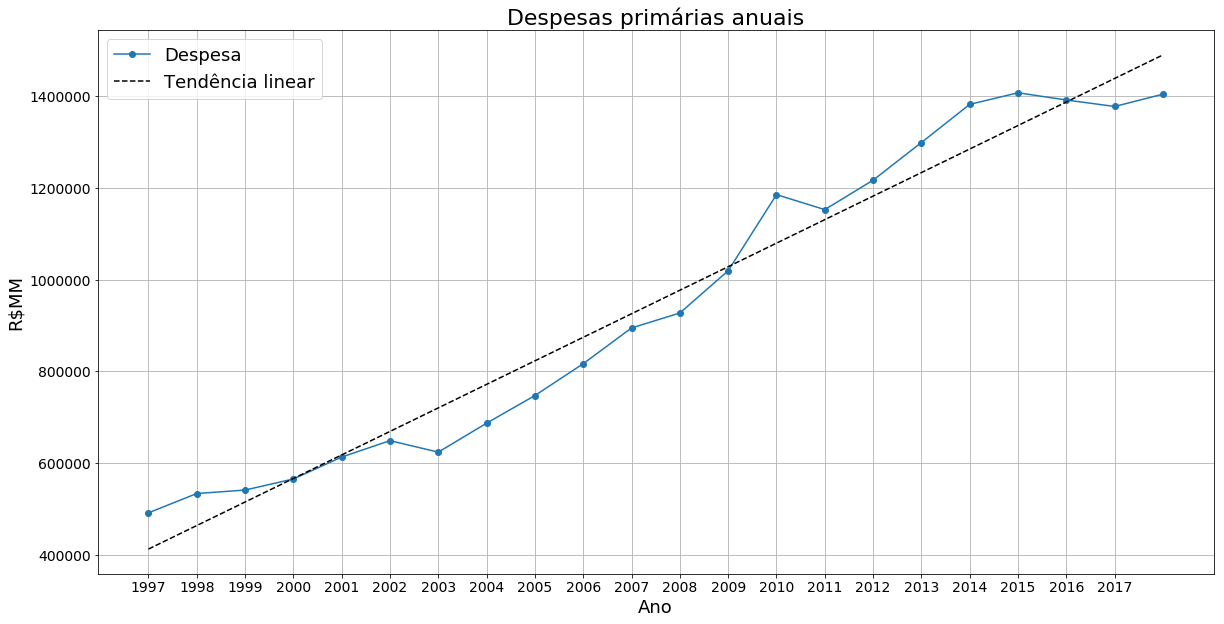

In [154]:
# Fit linear nas despesas
x = np.array(range(len(dados_ano.Ano)))
b, a = np.polyfit(x, dados_ano.Despesa, deg = 1)
lintrend = a + b*x

fig = plt.figure(figsize = (20, 10))

plt.plot(dados_ano.Ano, dados_ano.Despesa, 'o-', label = 'Despesa')
plt.plot(dados_ano.Ano, lintrend, '--', label = 'Tendência linear', color = 'black')
plt.legend(fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Ano', fontsize = 18)
plt.ylabel('R$MM', fontsize = 18)
plt.title('Despesas primárias anuais', fontsize = 22)
plt.xticks(ticks = range(1997,2018))
plt.grid(True)

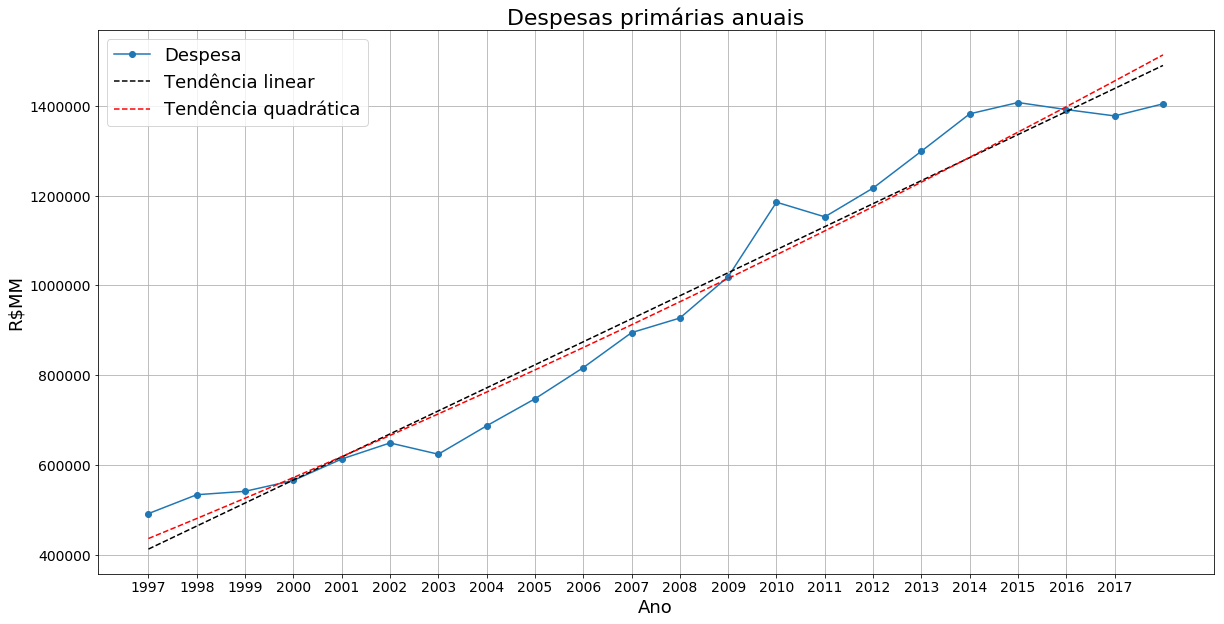

In [155]:
# Fit quadrático nas despesas
c, b, a = np.polyfit(x, dados_ano.Despesa, deg = 2)
quadtrend = a + b*x + c*x**2

fig = plt.figure(figsize = (20, 10))

plt.plot(dados_ano.Ano, dados_ano.Despesa, 'o-', label = 'Despesa')
plt.plot(dados_ano.Ano, lintrend, '--', label = 'Tendência linear', color = 'black')
plt.plot(dados_ano.Ano, quadtrend, '--', label = 'Tendência quadrática', color = 'red')
plt.legend(fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Ano', fontsize = 18)
plt.ylabel('R$MM', fontsize = 18)
plt.title('Despesas primárias anuais', fontsize = 22)
plt.xticks(ticks = range(1997,2018))
plt.grid(True)

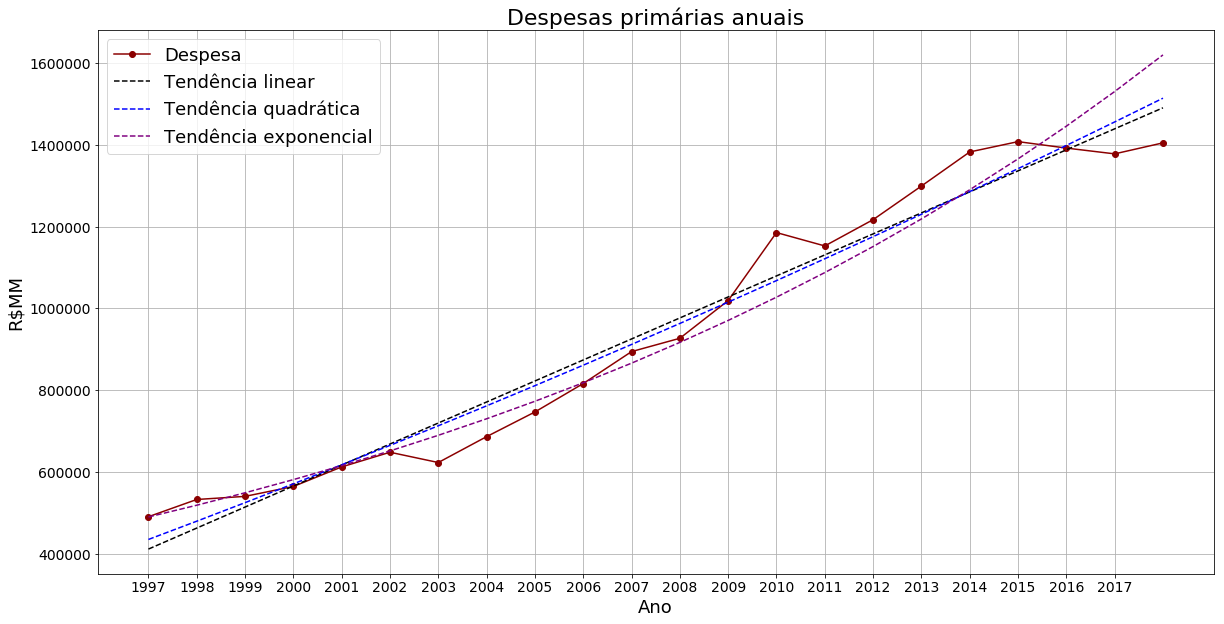

In [156]:
# Fit exponencial nas despesas
x = np.array(range(len(dados_ano.Ano)))
b, a = np.polyfit(x, np.log(dados_ano.Despesa), deg = 1)
exptrend = np.exp(a + b*x)

fig = plt.figure(figsize = (20, 10))

plt.plot(dados_ano.Ano, dados_ano.Despesa, 'o-', label = 'Despesa', color = 'darkred')
plt.plot(dados_ano.Ano, lintrend, '--', label = 'Tendência linear', color = 'black')
plt.plot(dados_ano.Ano, quadtrend, '--', label = 'Tendência quadrática', color = 'blue')
plt.plot(dados_ano.Ano, exptrend, '--', label = 'Tendência exponencial', color = 'purple')
plt.legend(fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Ano', fontsize = 18)
plt.ylabel('R$MM', fontsize = 18)
plt.title('Despesas primárias anuais', fontsize = 22)
plt.xticks(ticks = range(1997,2018))
plt.grid(True)

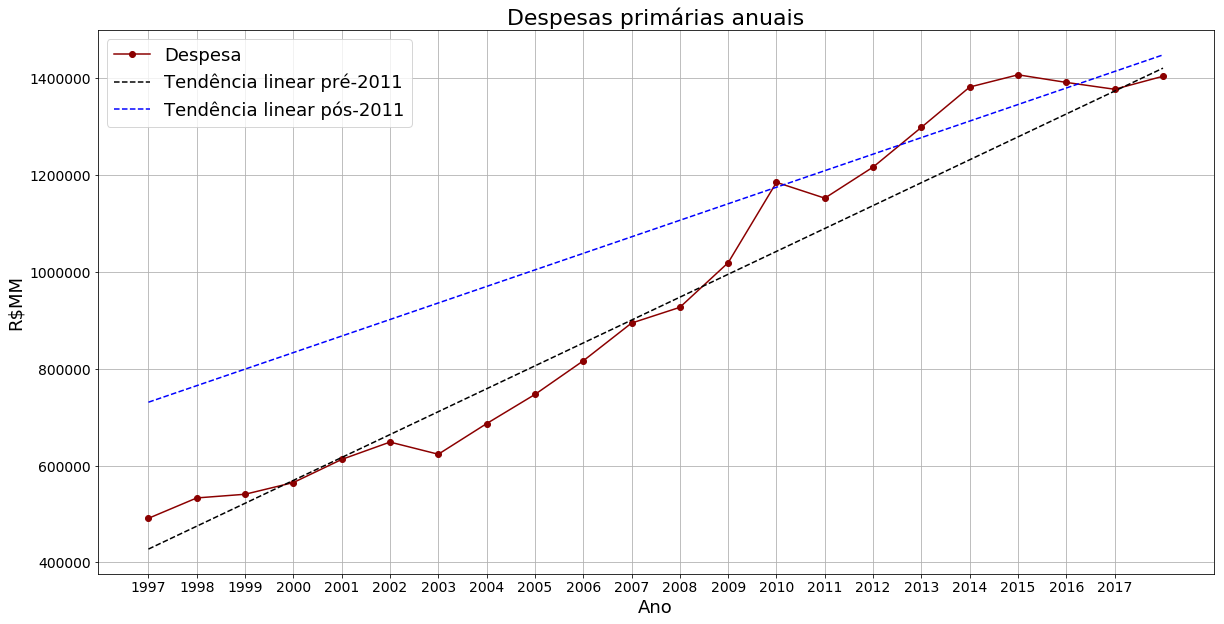

In [157]:
# Comparando tendências lineares pré 2011 x pós 2011 (inclusive)
x = np.array(range(len(dados_ano.Ano)))
y1 = dados_ano.loc[dados_ano.Ano < 2011, 'Despesa']
n = len(y1)
b, a = np.polyfit(x[:n], y1, deg = 1)
lintrend1 = a + b*x

y2 = dados_ano.loc[dados_ano.Ano >= 2011, 'Despesa']
b, a = np.polyfit(x[n:], y2, deg = 1)
lintrend2 = a + b*x

fig = plt.figure(figsize = (20, 10))

plt.plot(dados_ano.Ano, dados_ano.Despesa, 'o-', label = 'Despesa', color = 'darkred')
plt.plot(dados_ano.Ano, lintrend1, '--', label = 'Tendência linear pré-2011', color = 'black')
plt.plot(dados_ano.Ano, lintrend2, '--', label = 'Tendência linear pós-2011', color = 'blue')

plt.legend(fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Ano', fontsize = 18)
plt.ylabel('R$MM', fontsize = 18)
plt.title('Despesas primárias anuais', fontsize = 22)
plt.xticks(ticks = range(1997,2018))
plt.grid(True)

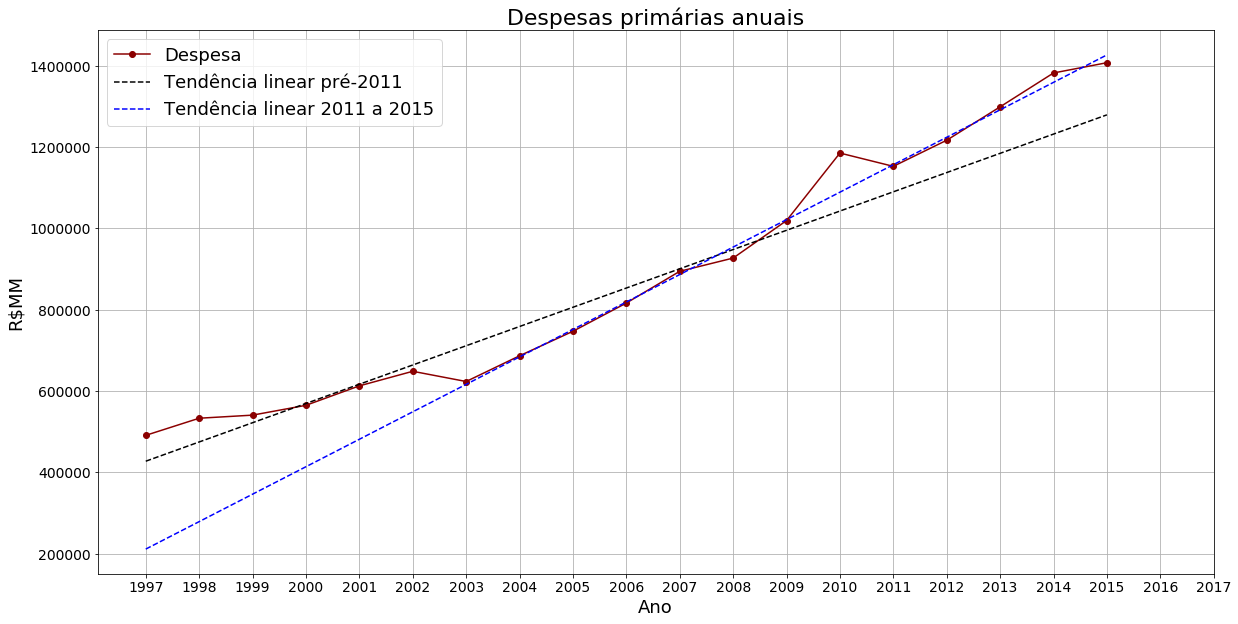

In [158]:
# Comparando tendências lineares pré 2011 x pós 2011 (inclusive), descartando dados após 2015
x = np.array(range(len(dados_ano.loc[dados_ano.Ano <=2015, 'Ano'])))

y1 = dados_ano.loc[(dados_ano.Ano < 2011) & (dados_ano.Ano <= 2015), 'Despesa']
n = len(y1)
b, a = np.polyfit(x[:n], y1, deg = 1)
lintrend1 = a + b*x

n2 = len(dados_ano[(dados_ano.Ano >= 2011) & (dados_ano.Ano <= 2015)])
y2 = dados_ano.loc[(dados_ano.Ano >= 2011) & (dados_ano.Ano <= 2015), 'Despesa']
b2, a2 = np.polyfit(x[n:], y2, deg = 1)
lintrend2 = a2 + b2*x

fig = plt.figure(figsize = (20, 10))

plt.plot(dados_ano.loc[dados_ano.Ano <=2015, 'Ano'], dados_ano.loc[dados_ano.Ano <=2015, 'Despesa'], 'o-', label = 'Despesa', color = 'darkred')
plt.plot(dados_ano.loc[dados_ano.Ano <=2015, 'Ano'], lintrend1, '--', label = 'Tendência linear pré-2011', color = 'black')
plt.plot(dados_ano.loc[dados_ano.Ano <=2015, 'Ano'], lintrend2, '--', label = 'Tendência linear 2011 a 2015', color = 'blue')

plt.legend(fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Ano', fontsize = 18)
plt.ylabel('R$MM', fontsize = 18)
plt.title('Despesas primárias anuais', fontsize = 22)
plt.xticks(ticks = range(1997,2018))
plt.grid(True)

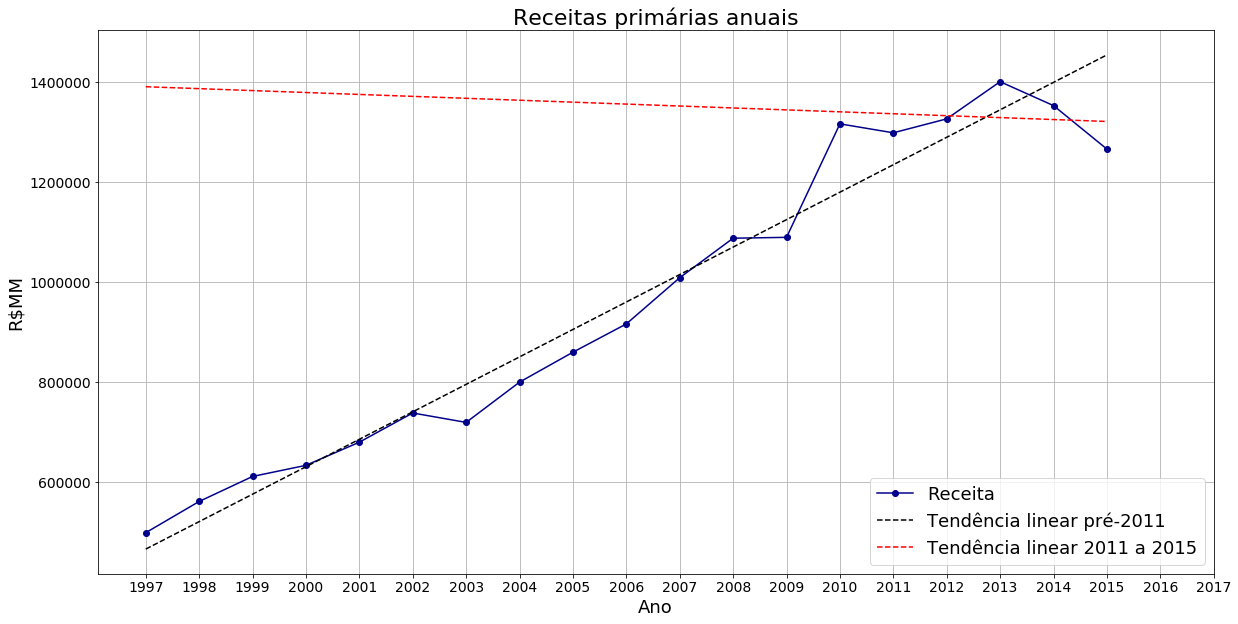

In [221]:
# Receita
# Comparando tendências lineares pré 2011 x pós 2011 (inclusive), descartando dados após 2015
x = np.array(range(len(dados_ano.loc[dados_ano.Ano <=2015, 'Ano'])))

y1 = dados_ano.loc[(dados_ano.Ano < 2011) & (dados_ano.Ano <= 2015), 'recliq']
n = len(y1)
b, a = np.polyfit(x[:n], y1, deg = 1)
lintrend1 = a + b*x

n2 = len(dados_ano[(dados_ano.Ano >= 2011) & (dados_ano.Ano <= 2015)])
y2 = dados_ano.loc[(dados_ano.Ano >= 2011) & (dados_ano.Ano <= 2015), 'recliq']
b2, a2 = np.polyfit(x[n:], y2, deg = 1)
lintrend2 = a2 + b2*x

fig = plt.figure(figsize = (20, 10))

plt.plot(dados_ano.loc[dados_ano.Ano <=2015, 'Ano'], dados_ano.loc[dados_ano.Ano <=2015, 'recliq'], 'o-', label = 'Receita', color = 'darkblue')
plt.plot(dados_ano.loc[dados_ano.Ano <=2015, 'Ano'], lintrend1, '--', label = 'Tendência linear pré-2011', color = 'black')
plt.plot(dados_ano.loc[dados_ano.Ano <=2015, 'Ano'], lintrend2, '--', label = 'Tendência linear 2011 a 2015', color = 'red')

plt.legend(fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Ano', fontsize = 18)
plt.ylabel('R$MM', fontsize = 18)
plt.title('Receitas primárias anuais', fontsize = 22)
plt.xticks(ticks = range(1997,2018))
plt.grid(True)

0.5062271447533715


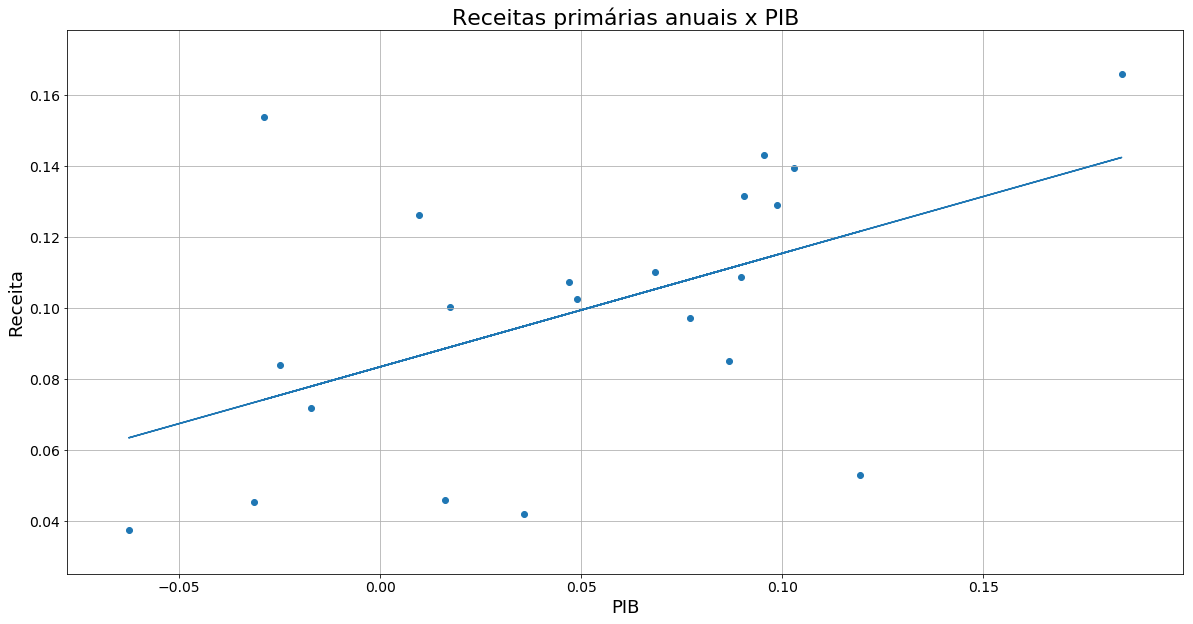

In [206]:
# Variação
df = dfpib_ano.merge(dados_ano, left_on = 'data', right_on = 'Ano', how = 'inner')
dfdif = df.pct_change()
dfdif = dfdif[~dfdif.pib.isna()]
dfdif.drop(['data', 'Ano'], axis = 1, inplace = True)

b, a = np.polyfit(dfdif.Receita, dfdif.pib, deg = 1)
lintrend = a + b*dfdif.Receita

print(np.corrcoef(dfdif.Receita, dfdif.pib)[0,1])

fig = plt.figure(figsize = (20, 10))

plt.scatter(dfdif.Receita, dfdif.pib)
plt.plot(dfdif.Receita, lintrend, '-')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('PIB', fontsize = 18)
plt.ylabel('Receita', fontsize = 18)
plt.title('Receitas primárias anuais x PIB', fontsize = 22)
plt.grid(True)


0.30866680825113996


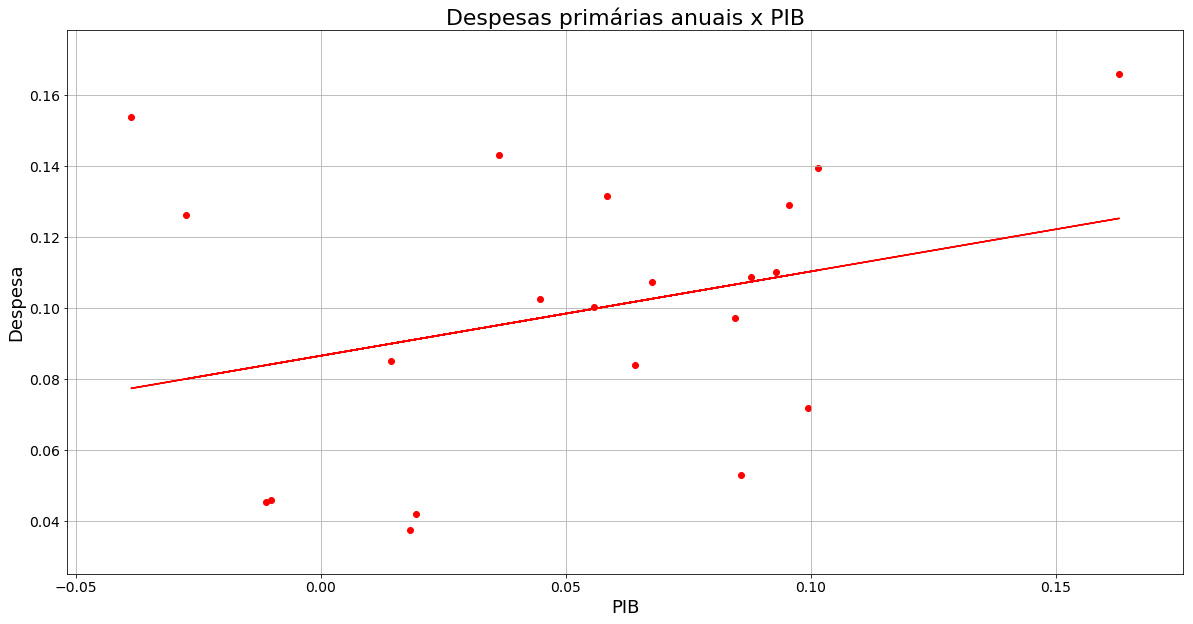

In [205]:
b, a = np.polyfit(dfdif.Despesa, dfdif.pib, deg = 1)
lintrend = a + b*dfdif.Despesa
print(np.corrcoef(dfdif.Despesa, dfdif.pib)[0,1])

fig = plt.figure(figsize = (20, 10))

plt.scatter(dfdif.Despesa, dfdif.pib, color = 'red')
plt.plot(dfdif.Despesa, lintrend, '-', color = 'red')


plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('PIB', fontsize = 18)
plt.ylabel('Despesa', fontsize = 18)
plt.title('Despesas primárias anuais x PIB', fontsize = 22)
plt.grid(True)